In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Linear fit is not as accurate as polinomial would be.

# Linear example

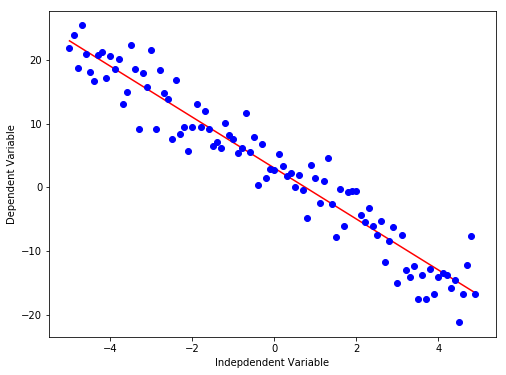

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

# Generate Dataset
# You can adjust the slope and intercept to verify the changes in the graph

y = -4*x + 3
noise = 3 * np.random.normal(size=x.size)

plt.figure(figsize=(8,6))
plt.plot(x, y, 'r')
plt.plot(x, y + noise,  'bo') # data
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Non Linear Example

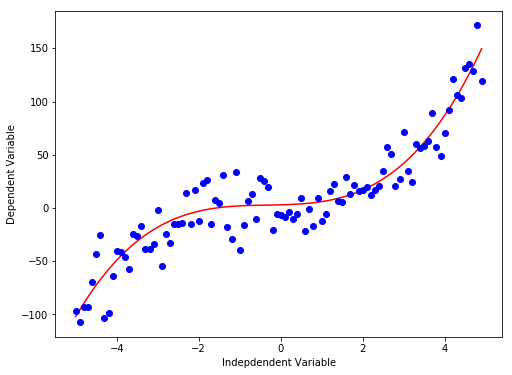

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

# Generate Dataset
# You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
noise = 20 * np.random.normal(size=x.size)

plt.figure(figsize=(8,6))
plt.plot(x, y, 'r')
plt.plot(x, y + noise,  'bo') # data
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

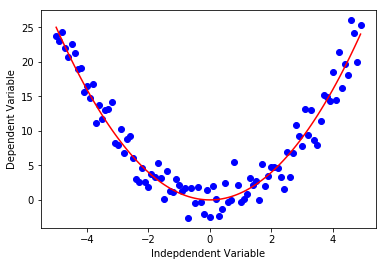

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

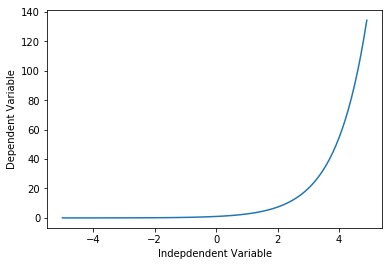

In [5]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


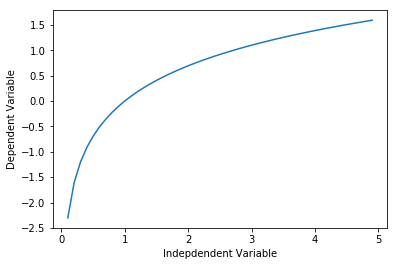

In [6]:
X_with_zero = np.arange(-5.0, 5.0, 0.1)
X = X_with_zero[X_with_zero!=0] # remove 0 value from X_with_zero
Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Sigmoid/Logistic

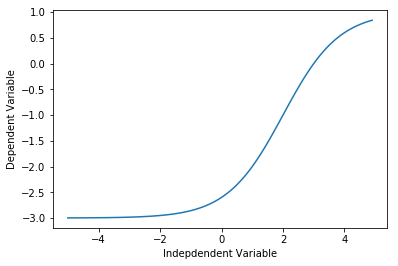

In [7]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

# Download Dataset

In [8]:
import numpy as np
import pandas as pd

# downloading dataset

!curl -o china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1218  100  1218    0     0   2480      0 --:--:-- --:--:-- --:--:--  2480


In [9]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


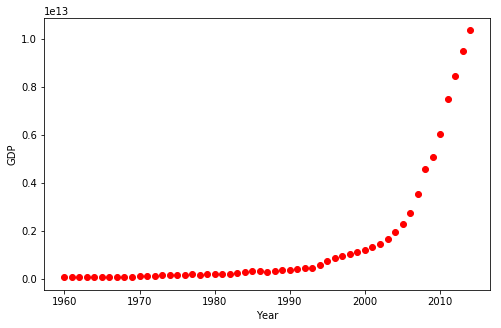

In [10]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

## Building Model

In [11]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

## A Particular Case

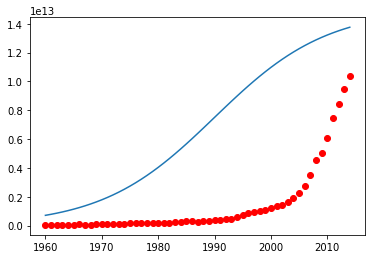

In [12]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')
plt.show()

In [13]:
# Lets normalize our data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

## Fit a Curve

In [14]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453018, beta_2 = 0.997207


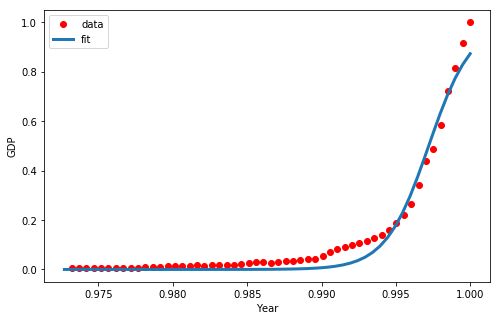

In [15]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Accuracy of The Model

#### Using Mask

In [16]:
mask = np.random.rand(len(df)) < 0.8

In [17]:
X = df.Year.values
y = df.Value.values

In [18]:
# it is important to normalize, otherwise i would get a warining
X = X/max(X)
y = y/max(y)

In [19]:
X_train, X_test = X[mask], X[~mask]
y_train, y_test = y[mask], y[~mask]

In [20]:
popt, pcov = curve_fit(sigmoid, X_train, y_train)

### Get an Estimation

In [21]:
y_hat = sigmoid(X_test, *popt)

In [22]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.0012
R2-score: 0.98
